In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

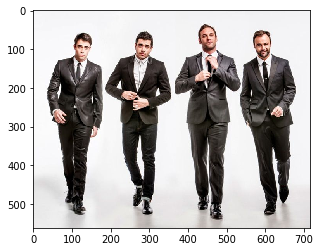

In [26]:
img=cv2.imread("grp5.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [27]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']

In [28]:
age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')
font = cv2.FONT_HERSHEY_SIMPLEX

In [30]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = face_cascade.detectMultiScale(img, 1.1, 5)
if(len(faces)>0):
    print("Found {} faces".format(str(len(faces))))
for (x, y, w, h )in faces:
    cv2.rectangle(RGB_img, (x, y), (x+w, y+h), (255, 20, 57), 2)#Get Face 
    face_img = RGB_img[y:y+h, x:x+w].copy()       
    blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)#Predict Gender
    gender_net.setInput(blob)
    gender_preds = gender_net.forward()
    gender = gender_list[gender_preds[0].argmax()]
    print("Gender : " + gender)#Predict Age
    age_net.setInput(blob)
    age_preds = age_net.forward()
    age = age_list[age_preds[0].argmax()]
    print("Age Range: " + age)
    overlay_text= "%s %s" % (gender, age)
    cv2.putText(RGB_img, overlay_text, (x, y), font, 1, (57, 255, 20), 2, cv2.LINE_AA)
    img = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2RGB)
    cv2.imshow('frame', img)  
    cv2.waitKey(0)

Found 4 faces
Gender : Male
Age Range: (25, 32)
Gender : Male
Age Range: (8, 12)
Gender : Male
Age Range: (25, 32)
Gender : Male
Age Range: (25, 32)


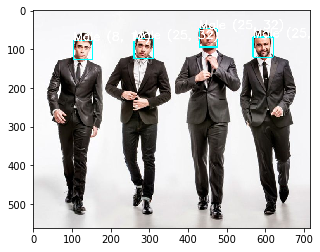

In [15]:
plt.imshow(img)